I want to make a single query and have it return data across the datasets

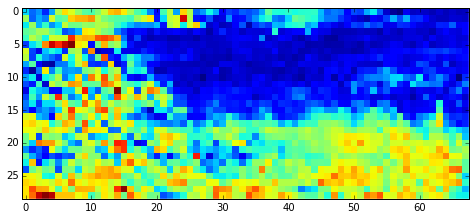

,nothing,Year,DOY,CR3000 CF Change [counts],CR3000 Zen Angle [degrees],Global LI-200 [W/m^2],Global CM22 (vent/cor) [W/m^2],Global RG780 PSP (vent/cor) [W/m^2],Global TSP-1 [W/m^2],Global CM6b (cor) [W/m^2],Global SP Lite [W/m^2],Global SP-110 [W/m^2],Global TSP-700 Vent [W/m^2],Research 1,Research 2,Global TUVR [W/m^2],Global 501A [W/m^2],Global 501A [MED/hr],Global MS210W [W/m^2],Global CUVA1 [W/m^2],Global CUVB1 [W/m^2],Global UV-S-A-T [W/m^2],Global UV-S-B-T [W/m^2],Global UVB-1 [W/m^2],Global 501A [Index],Direct NIP #1 [W/m^2],Direct NIP #2 [W/m^2],Direct LI-201 [W/m^2],Direct RG780 NIP [W/m^2],Direct CH1 [W/m^2],Zebra PSP (cor) [W/m^2],Direct CUVA2 [W/m^2],Direct CUVB2 [W/m^2],500nm TWC Photometer [V],Global SPN1 [W/m^2],Diffuse SPN1 [W/m^2],Data lab Dry Bulb Temp [deg C],Data lab RH [%],Diffuse PSP (sband/cor) [W/m^2],Research F1,Diffuse 8-48 (vent) [W/m^2],Diffuse CM22 (vent/cor) [W/m^2],Research F0,Research 3,Downwelling IR PIR Vent [W/m^2],Downwelling IR CG4 Vent [W/m^2],Upwelling IR PIR [W/m^2],Instrument Net DW PIR [W/m^2],Instrument Net DW CG4 [W/m^2],Instrument Net UW PIR [W/m^2],Global PSP (cor) [W/m^2],Global PSP (vent/cor) [W/m^2],Diffuse PSP (vent/cor) [W/m^2],Diffuse CUV4 [W/m^2],Global CUV4 [W/m^2],Avg Wind Speed @ 19ft [m/s],Avg Wind Direction @ 19ft [deg from N],Peak Wind Speed @ 19ft [m/s],Direct MS-56 [W/m^2],Research 4,PIR DW Dome Temp [deg K],PIR DW Case Temp [deg K],CG4 DW Case Temp [deg K],PIR UW Dome Temp [deg K],PIR UW Case Temp [deg K],CR3000 Temp [deg C],Deck Dry Bulb Temp [deg C],Deck RH [%],501A Temp [deg C],CUVA1 Temp [deg C],CUVB1 Temp [deg C],CUVA2 Temp [deg C],CUVB2 Temp [deg C],UVSAT Temp [deg C],UVSBT Temp [deg C],UVB-1 Temp [deg C],Horiz TP Thermal Corr,CR3000 Battery [VDC],CR3000 Pgm Time [s],Direct Quantum LI-190 [umol/s/m^2],Direct TUVR [W/m^2],Global PSP [mV],Global PSP Vent [mV],Global CM22 [mV],Global RG780 PSP [mV],Global CM6b [mV],Zebra PSP [mV],Diffuse PSP (sband) [mV],Diffuse PSP [mV],Diffuse CM22 [mV],Global Quantum LI-190 [umol/s/m^2],Global Photometric LI-210 [klux],Upwelling Shortwave CM3 (CNR1) [W/m^2],Upwelling IR CG3 (CNR1) [W/m^2],Instrument Net UW CG3 [W/m^2],Upwelling Shortwave PSP [W/m^2],Upwelling Shortwave LI-200 [W/m^2],Upwelling Quantum LI-190 [umol/s/m^2],CNR1 Case Temp [deg K],Global CM3 (CNR1) [W/m^2],Downwelling IR CG3 (CNR1) [W/m^2],Instrument Net DW CG3 [W/m^2],Snow Depth [cm],Precipitation [mm],Precipitation (Accumulated) [mm],Station Pressure [mBar],Global 40-South PSP [W/m^2],Global 40-South LI-200 [W/m^2],Global Normal CM-21 [W/m^2],Global 90-North PSP [W/m^2],Global 90-North LI-200 [W/m^2],Global 90-East PSP [W/m^2],Global 90-East LI-200 [W/m^2],Global 90-South PSP [W/m^2],Global 90-South LI-200 [W/m^2],Global 90-West PSP [W/m^2],Global 90-West LI-200 [W/m^2],Research RT0,Research RT1,Research RT2,Atmospheric Electric Field [kV/m],CR10X Temp (Rad-Twr) [deg C],CR10X Battery (Rad-Twr) [VDC],LI-2020 Battery [VDC],Tower Dry Bulb Temp [deg C],Tower RH [%],Avg Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Peak Wind Speed @ 6ft [m/s],CR10X Overuns (Rad-Twr) [counts],Snow Depth Quality,SE Dry Bulb Temp [deg C],SE RH [%],SE-POA Angle [degrees],Global SE-POA LI-200 [W/m^2],CR10X Overuns (Met-Twr) [counts],CR10X Temp (Met-Twr) [deg C],CR10X Battery (Met-Twr) [VDC],Vertical Wind Shear [1/s],Research PVT1,Research PVT2,Avg Wind Speed @ 22ft [m/s],Avg Wind Direction @ 22ft [deg from N],Avg Wind Speed @ 42ft [m/s],Avg Wind Direction @ 42ft [deg from N],Research PVT0,Peak Wind Speed @ 22ft [m/s],Peak Wind Speed @ 42ft [m/s],Delta UT1 [seconds],500nm TWC AOD,Net Radiation Eppley [W/m^2],Net Radiation K&Z [W/m^2],Atmos Net Infrared PIRs [W/m^2],Atmos Net Infrared K&Zs [W/m^2],Albedo (PSP),Albedo (K&Z),Albedo (LI-200),Albedo Quantum (LI-190),Broadband Turbidity,500nm Estimated AOD,Sea-Level Pressure (Est) [mBar],Tower Dew Point Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Wind Chill Temp [deg C],Deck Wind Chill Temp [deg C],Total Cloud Cover [%],Opaque 

,Power
datetime,
2014-04-05 18:00:00,10430.75


In [65]:
from datetime import datetime,timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_helper_functions import *
from IPython.display import display
pd.options.display.max_columns = 999
%matplotlib inline

desired_channel = 'BAND_01'
desired_date = datetime(2014, 4, 5)
desired_timedelta = timedelta(hours = 18)
desired_datetime = desired_date + desired_timedelta
satellite_filefolder = 'data/satellite/colorado/summer6months/data/'
sensor_filefolder = 'data/sensor_data/colorado6months/'
pvoutput_filefolder = 'data/pvoutput/pvoutput6months/'

#satellite data
satellite_filename = find_filename(desired_datetime, desired_channel, satellite_filefolder)
lons, lats, data = return_satellite_data(satellite_filename, satellite_filefolder)

plt.figure(figsize=(8, 8))
imgplot = plt.imshow(data)
imgplot.set_interpolation('none')
plt.show()

#sensor data
sensor_filename = find_file_from_date(desired_date, sensor_filefolder)
df_sensor = return_sensor_data(sensor_filename, sensor_filefolder)
df_sensor[df_sensor.index == desired_datetime]
display(df_sensor[df_sensor.index == desired_datetime])

#pvoutput data
pvoutput_filename = find_file_from_date(desired_date, pvoutput_filefolder)
df_pvoutput = return_pvoutput_data(pvoutput_filename, pvoutput_filefolder)
display(df_pvoutput[df_pvoutput.index == desired_datetime])